# Startups Profit Prediction - Regression

### Introduction: 
The goal of this project is to predict the profit of startup companies using the available features in the ”Startups” dataset. This dataset contains
information on 50 startups located in New York, California, and Florida. The features in this dataset are R&D spending, administration spending, marketing spending, and location features while the target variable is profit.

To achieve this goal, we will employ the concept of multiple linear regression, a widely used statistical technique for modeling the relationship between a dependent variable (in this case, profit) and multiple independent variables (the various feature attributes). By leveraging the predictive power of multiple linear regression, we aim to develop a model that can accurately forecast the profit of startups based on the provided features.

### Import Libraries

In [1]:
# For data manipulation and analysis
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns  

### Read Data

In [2]:
# Load the 'Startups.csv' dataset into a pandas DataFrame
df=pd.read_csv('Startups.csv')

### Exploratory Data Analysis

#### Step I. Preliminary Examination

In [3]:
# Display the first 5 rows of the DataFrame
df.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Get the shape of the DataFrame
df.shape 

(50, 5)

In [5]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Step II. Handling Missing Values

In [6]:
# Check the number of missing values in each column
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Step III. Summarizing Data

In [7]:
# Generate descriptive statistics for the DataFrame
df.describe() 

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Step IV. Data Visualization

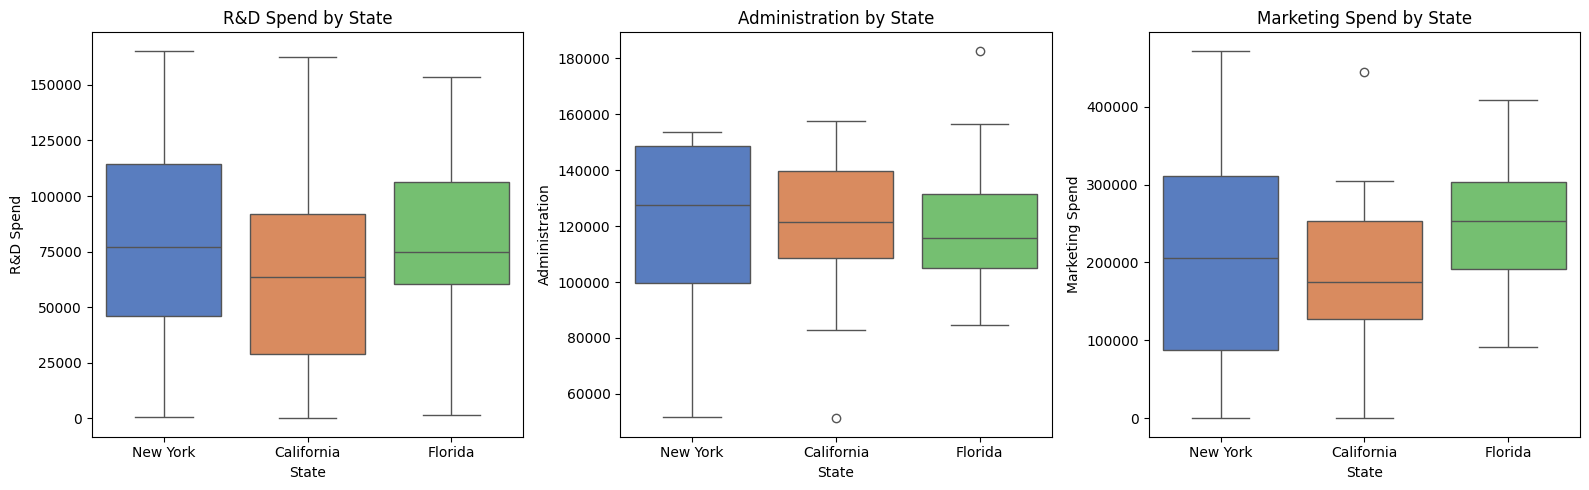

In [8]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
# Plot a boxplot of R&D Spend by State
sns.boxplot(x='State', y='R&D Spend', hue='State', palette='muted', data=df, ax=ax1)
ax1.set_title('R&D Spend by State')
# Plot a boxplot of Administration by State
sns.boxplot(x='State', y='Administration', hue='State', palette='muted', data=df, ax=ax2)
ax2.set_title('Administration by State')
# Plot a boxplot of Marketing Spend by State
sns.boxplot(x='State', y='Marketing Spend', hue='State', palette='muted', data=df, ax=ax3)
ax3.set_title('Marketing Spend by State')
# Adjust the layout of the subplots
plt.tight_layout();

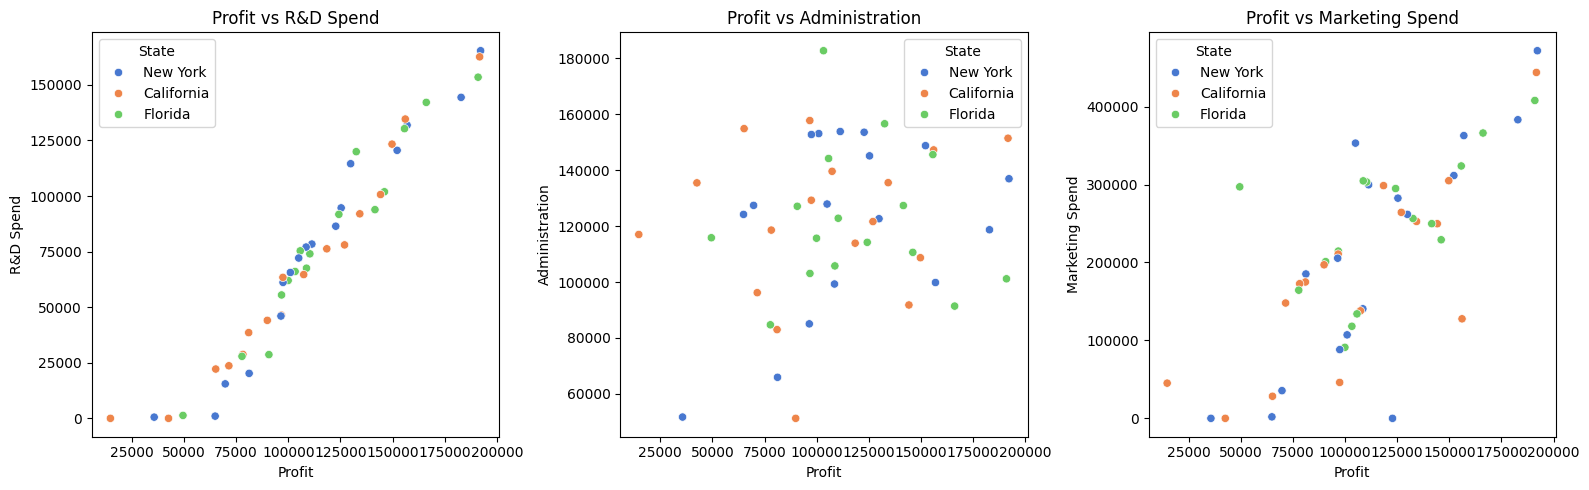

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
# Plot a scatterplot of Profit vs R&D Spend
sns.scatterplot(x='Profit', y='R&D Spend', hue='State', palette='muted', data=df, ax=ax1)
ax1.set_title('Profit vs R&D Spend')
# Plot a scatterplot of Profit vs Administration
sns.scatterplot(x='Profit', y='Administration', hue='State', palette='muted', data=df, ax=ax2)
ax2.set_title('Profit vs Administration')
# Plot a scatterplot of Profit vs Marketing Spend
sns.scatterplot(x='Profit', y='Marketing Spend', hue='State', palette='muted', data=df, ax=ax3)
ax3.set_title('Profit vs Marketing Spend')

plt.tight_layout();

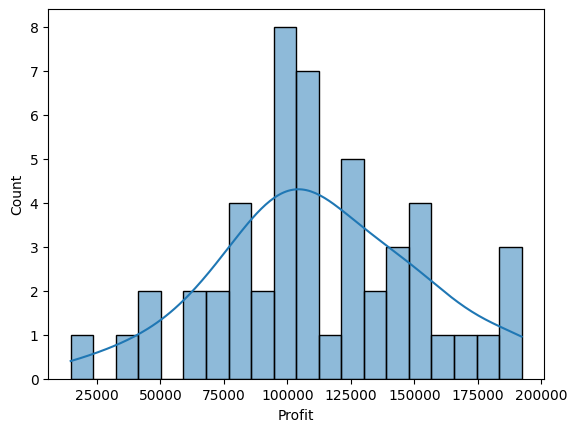

In [10]:
sns.histplot(x=df['Profit'],kde=True,bins=20);

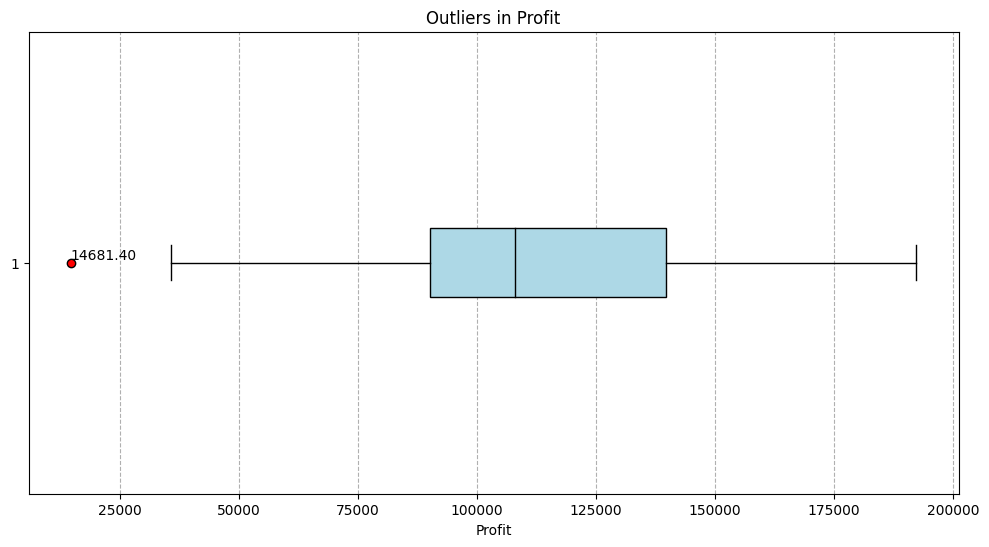

In [11]:
# Create a horizontal boxplot and mark the outliers
fig, ax = plt.subplots(figsize=(12, 6))
box = ax.boxplot(df['Profit'], vert=False, showfliers=True, flierprops={'markerfacecolor': 'red', 'marker': 'o'}, patch_artist=True)

# Set the box colors, line styles, and other customizations
ax.set_title('Outliers in Profit')
ax.set_xlabel('Profit')
ax.grid(axis='x', linestyle='--')

for patch in box['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('black')
    
for median in box['medians']:
    median.set_color('black')
    
# Add labels for the outlier values
fliers = box['fliers'][0].get_xdata()
for flier in fliers:
    ax.text(flier, 1, f"{flier:.2f}", ha='left', va='bottom')

#### Step V. Correlation Analysis

In [12]:
# Calculate the correlation matrix for the numeric columns in the DataFrame
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


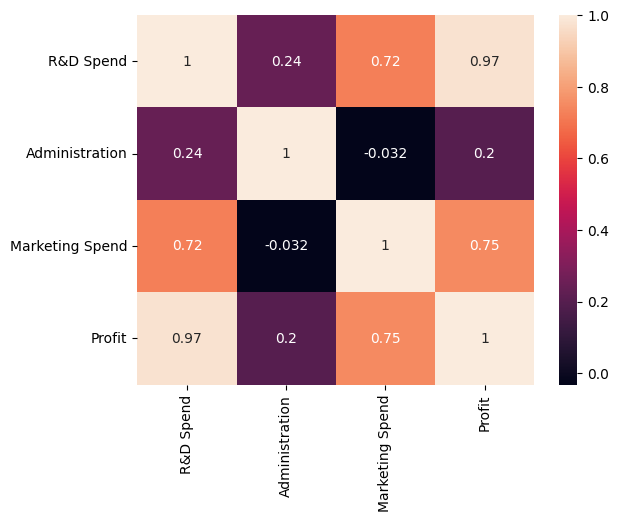

In [13]:
# Create a heatmap visualization of the correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True);

### $z$-test statistic and $p$-value

In [14]:
# For numerical operations
import numpy as np

# For calculating p-value using the normal distribution function
from scipy.stats import norm 

# Extract the 'R&D Spend' and 'Profit' columns from the dataframe
r_and_d_spend = df['R&D Spend']
profit = df['Profit']

# Calculate the z-statistic for the difference between the means of R&D Spend and Profit
z_statistic = (r_and_d_spend.mean() - profit.mean()) / np.sqrt(r_and_d_spend.std()**2/len(r_and_d_spend) + profit.std()**2/len(profit))

# Calculate the p-value using the normal distribution function
p_value = 2 * norm.cdf(-abs(z_statistic))

# Print the z-statistic and p-value
print(f"z-statistic: {z_statistic}")
print(f"P-value: {p_value:.10f}")

# Set the significance level (alpha)
alpha = 0.05

# Determine whether to reject or accept the null hypothesis
if p_value < alpha:
    print("H0 is rejected. There is a statistically significant difference between R&D Spend and Profit.")
else:
    print("H0 is accepted. There is no statistically significant difference between R&D Spend and Profit.")

z-statistic: -4.432350808349653
P-value: 0.0000093211
H0 is rejected. There is a statistically significant difference between R&D Spend and Profit.


### Data Preparation

In [15]:
# Extract the feature (independent) variables from the dataframe
x=df[['R&D Spend', 'Administration', 'Marketing Spend']] 
# Extract the target (dependent) variable from the dataframe
y=df[['Profit']]

In [16]:
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 42)

### Data Modeling

In [17]:
# For implementing linear regression
from sklearn.linear_model import LinearRegression 
# Create a LinearRegression object
lr = LinearRegression()
# Fit the model to the training data
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the test set
prediction = lr.predict(x_test)

### Model Evaluation

In [20]:
# For evaluating model performance
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
# Calculate the mean squared error
mean_squared_error(y_test, prediction)**.5

9042.795443637518

In [22]:
# Calculate the R-squared score
r2_score(y_test, prediction)

0.9418819530700165

In [23]:
# For numerical operations
import numpy as np

# Create a DataFrame to store the actual and predicted target values
df = pd.DataFrame({'Test': np.array(y_test).reshape(-1), 'Prediction': np.array(prediction).reshape(-1)})
#`np.array(y_test).reshape(-1)`: This converts the `y_test` array (which may have a different shape) into a 1D array using the `reshape(-1)` method.
#`np.array(prediction).reshape(-1)`: This converts the `prediction` array (which may have a different shape) into a 1D array using the `reshape(-1)`.
# Display a sample of 5 rows from the DataFrame
df.sample(5)

,Test,Prediction
0,134307.35,125972.148263
5,35673.41,52602.190537
1,81005.76,85471.922710
10,141585.52,128110.853888
14,182901.99,173293.949649


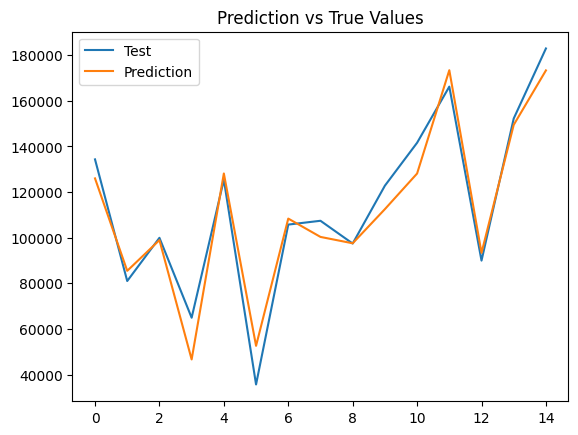

In [24]:
# Plot the actual and predicted target values as a line plot
df.plot(kind='line')
plt.title('Prediction vs True Values');

### Conclusion:
The results of the multiple linear regression analysis on the "Startups" dataset have yielded promising insights. The model achieved an impressive R-squared value of 0.94188, indicating that the selected features can explain a significant portion of the variation in the profit variable. Additionally, the MSE of the model's predictions is 9042.795, suggesting a relatively low level of error in the forecasted values.
These findings suggest that the multiple linear regression approach is well-suited for modeling the relationship between the startup's financial and operational metrics (R\&D spending, administration spending, marketing spending) and their profitability. 